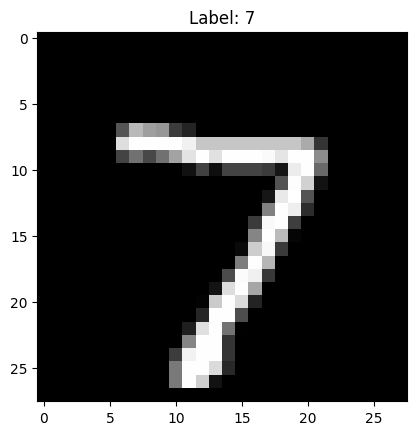

In [11]:
import matplotlib.pyplot as plt

# Visualize one digit from the dataset
example_data, example_target = next(iter(loaders['test']))
plt.imshow(example_data[0].squeeze(), cmap='gray')
plt.title(f'Label: {example_target[0]}')
plt.show()

In [10]:
!pip install torchvision

from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms # Import necessary modules for MNIST

# Define the CNN model
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x): # Corrected function name to 'forward'
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    return F.log_softmax(x, dim=1) # Changed to log_softmax for CrossEntropyLoss

# Load the MNIST dataset and split into train and test sets
train_data = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.MNIST( # Define test_data by loading the MNIST dataset
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)
# Create DataLoaders
loaders = {
    'train': DataLoader(train_data, batch_size=32, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=32, shuffle=False, num_workers=1)
}

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate model, optimizer and loss function
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Define the training function
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

# Define the testing function
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()  # sum up batch loss
      pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)

  print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

# Run the training loop
for epoch in range(1, 11):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306225
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.268692
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.079397
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.888876
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.573208
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.227150
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.114335
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.023033
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.698933
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.249920
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.438386
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.689906
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.524113
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.745802
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.795148
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.604393
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.589044
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.240332
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.322004
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.353084
Train Epoch: 1 [12800/60000 (

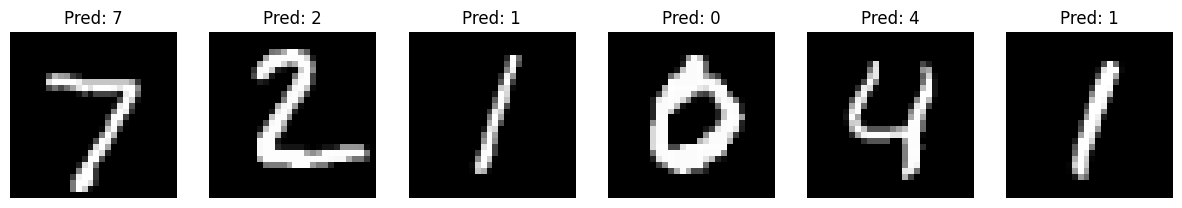

In [12]:
# Make predictions on a few test images
model.eval()
with torch.no_grad():
    example_data, example_target = next(iter(loaders['test']))
    example_data, example_target = example_data.to(device), example_target.to(device)
    output = model(example_data)
    pred = output.argmax(dim=1, keepdim=True)

# Print predictions and corresponding images
fig, axes = plt.subplots(1, 6, figsize=(15, 4))
for i in range(6):
    axes[i].imshow(example_data[i].cpu().squeeze(), cmap='gray')
    axes[i].set_title(f'Pred: {pred[i].item()}')
    axes[i].axis('off')
plt.show()